In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , Model
from tensorflow.keras.applications import InceptionV3
class Santa(object):
    '''class docstring'''
    def __init__(self,train_path,test_path)->None :
        self.__pthtr = train_path
        self.__pthts = test_path
    def Generator(self,tsize=(150,150),cmode='categorical',data_aug=False):
        '''function docstring'''
        if data_aug :
            gentr = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     zoom_range=0.2)
            gen = ImageDataGenerator(rescale=1/255)
            ready_train = gentr.flow_from_directory(self.__pthtr,
                                                    target_size=tsize,batch_size=6,class_mode=cmode)
            ready_test = gen.flow_from_directory(self.__pthts,
                                                   target_size=tsize,batch_size=12,class_mode=cmode)
            return ready_train , ready_test
        else :
            gen = ImageDataGenerator(rescale=1/255)
            ready_train = gen.flow_from_directory(self.__pthtr,
                                                    target_size=tsize,batch_size=bsize,class_mode=cmode)
            ready_test = gen.flow_from_directory(self.__pthts,
                                                   target_size=tsize,batch_size=bsize,class_mode=cmode)
            return ready_train , ready_test
    def Create_model(self,optm,Loss,Metric,pre_trained_model) :
        '''function docstring'''
        pre = pre_trained_model(include_top=False,input_shape=(150,150,3))
        for layer in pre.layers :
            layer.trainable = False
        last_layer = pre.get_layer('mixed7')
        last_out = last_layer.output
        x = layers.Flatten()(last_out)
        x = layers.Dense(2,activation='relu')(x)
        x = layers.Dense(1,activation='sigmoid')(x)
        model = Model(pre.input,x)
        model.compile(optimizer=optm,
                     loss=Loss,
                     metrics=[Metric])
        return model
    def Fit(self,alg,train,valid,Epoch=None)->dict:
        history = alg.fit(train,epochs=Epoch,validation_data=(valid))
        return history.history

In [24]:
classifier = Santa("D:\\datasets\\Santa\\is that santa\\train",
                   "D:\\datasets\\Santa\\is that santa\\test")
train_set, valid_set = classifier.Generator(cmode='binary',data_aug=True)
teacher = classifier.Create_model(optm='rmsprop',
                                  Loss='binary_crossentropy',
                                  Metric='accuracy',
                                 pre_trained_model=InceptionV3)
restlt = classifier.Fit(teacher,train_set,valid_set,Epoch=10)

Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.
Epoch 1/10
103/103 [==============================] - 39s 358ms/step - loss: 0.3250 - accuracy: 0.8795 - val_loss: 0.1587 - val_accuracy: 0.9383
Epoch 2/10
103/103 [==============================] - 35s 336ms/step - loss: 0.1842 - accuracy: 0.9218 - val_loss: 0.1356 - val_accuracy: 0.9464
Epoch 3/10
103/103 [==============================] - 34s 332ms/step - loss: 0.1724 - accuracy: 0.9397 - val_loss: 0.1489 - val_accuracy: 0.9497
Epoch 4/10
103/103 [==============================] - 34s 335ms/step - loss: 0.1602 - accuracy: 0.9463 - val_loss: 0.1230 - val_accuracy: 0.9578
Epoch 5/10
103/103 [==============================] - 31s 303ms/step - loss: 0.1377 - accuracy: 0.9463 - val_loss: 0.1762 - val_accuracy: 0.9416
Epoch 6/10
103/103 [==============================] - 31s 307ms/step - loss: 0.1127 - accuracy: 0.9560 - val_loss: 0.1536 - val_accuracy: 0.9513
Epoch 7/10
103/103 [============================

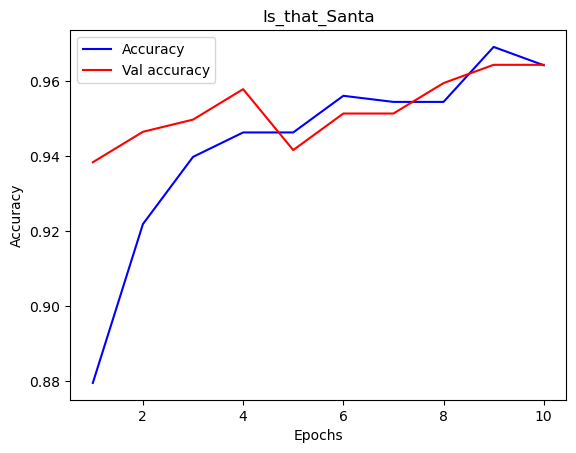

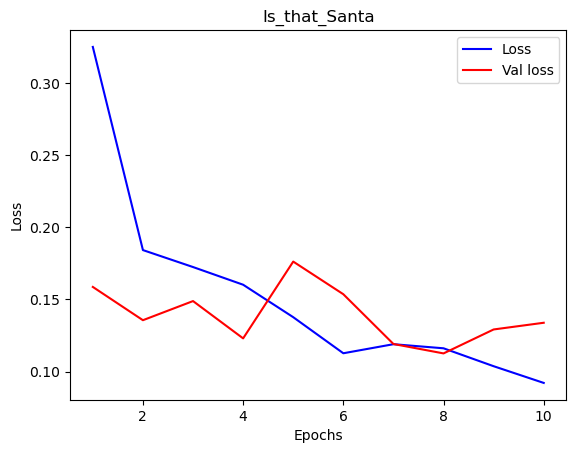

In [26]:
#Visualize models performance
import matplotlib.pyplot as plt
Range = range(1,11)
plt.plot(Range,restlt['accuracy'],'blue')
plt.plot(Range,restlt['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Is_that_Santa')
plt.legend(['Accuracy','Val accuracy'])
plt.show()
plt.plot(Range,restlt['loss'],'blue')
plt.plot(Range,restlt['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Is_that_Santa')
plt.legend(['Loss','Val loss'])
plt.show()